In [33]:
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Load and preprocess the data
data = pd.read_csv('student_data.csv')

# Assuming that your CSV contains features and labels, separate them
X = data.drop('Results', axis=1)  # Replace 'label_column_name' with the actual column name
y = data['Results']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM model with linear kernel: {accuracy * 100:.2f}%")


Accuracy of the SVM model with linear kernel: 85.00%


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('student_data.csv')

# Define your independent variables (features) and the target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']  # Assuming 'pass_exam' is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

# Get the coefficients and intercept of the logistic regression model
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Accuracy: 0.85
Confusion Matrix:
[[ 5  1]
 [ 2 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Coefficients: [[2.86346365 0.75295157]]
Intercept: [1.85180051]


----- Retry

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('student_data.csv')


X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (beta_1 and beta_2):", coefficients)
print("Intercept (beta_0):", intercept)


Accuracy:  0.9
Confusion Matrix:
 [[3 1]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

Coefficients (beta_1 and beta_2): [[1.36734806 1.66020432]]
Intercept (beta_0): [-4.41161515]


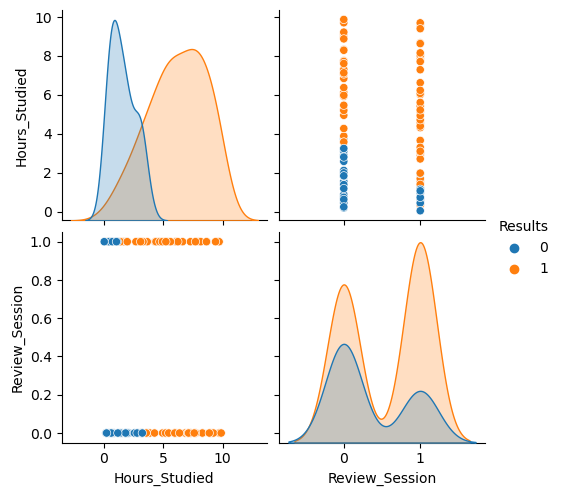

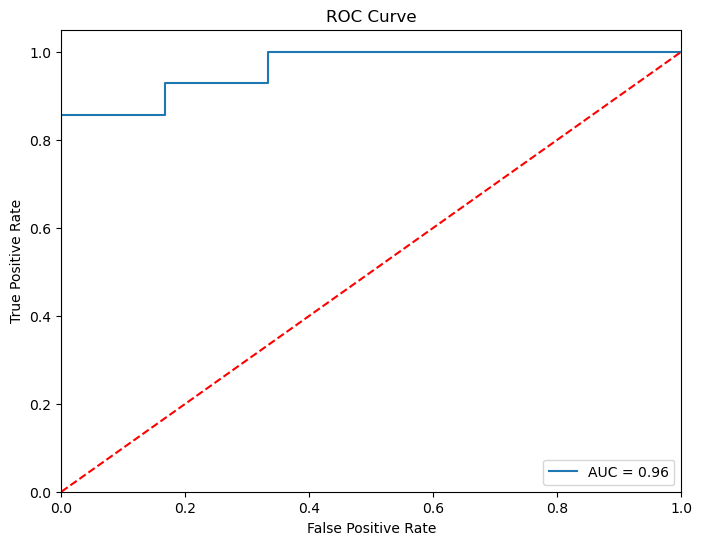

Model Coefficients:
Hours_Studied: 1.4037
Review_Session: 1.4285
Intercept: -4.5814


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.read_csv("student_data.csv")

X = data.drop('Results', axis=1)  # Replace 'target_variable' with the name of your target variable
y = data['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the data (You can customize this plot)
sns.pairplot(data, hue='Results')  # Replace 'target_variable' with the actual name

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")


Accuracy with best gamma: 0.85


/Users/surreya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


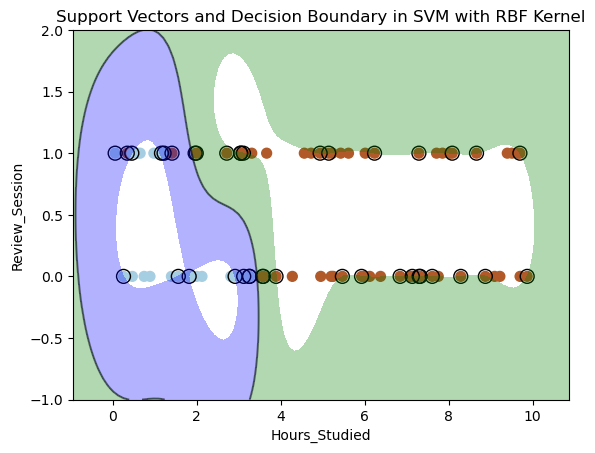

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}

svm_model = SVC(kernel='rbf')

# Set the number of folds for cross-validation
k_folds = 5

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=k_folds, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best gamma parameter
best_gamma = grid_search.best_params_['gamma']

# Train a new SVM model with the best gamma
best_svm_model = SVC(kernel='rbf', gamma=best_gamma)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best gamma: {accuracy:.2f}")

import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1, 100),
                     np.linspace(X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1, 100))

# Calculate the decision function for each point in the mesh grid
Z = best_svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter plot of data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', s=50)

# Highlight support vectors
plt.scatter(best_svm_model.support_vectors_[:, 0], best_svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot decision boundary lines
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'green', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.xlabel('Hours_Studied')
plt.ylabel('Review_Session')
plt.title('Support Vectors and Decision Boundary in SVM with RBF Kernel')
plt.show()


/Users/surreya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


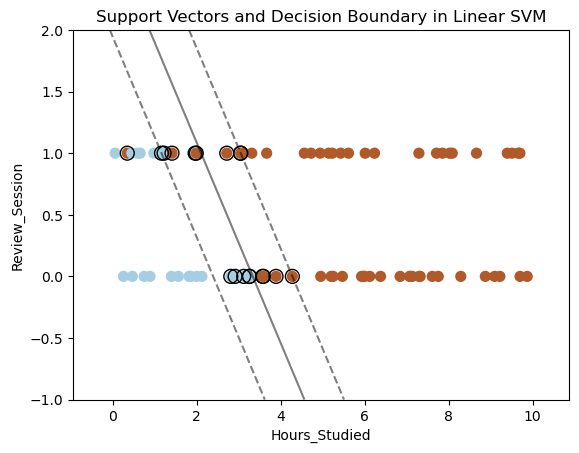

In [59]:
import matplotlib.pyplot as plt

# Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1, 100),
                     np.linspace(X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter plot of data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', s=50)

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot decision boundary lines
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Hours_Studied')
plt.ylabel('Review_Session')
plt.title('Support Vectors and Decision Boundary in Linear SVM')
plt.show()


/Users/surreya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


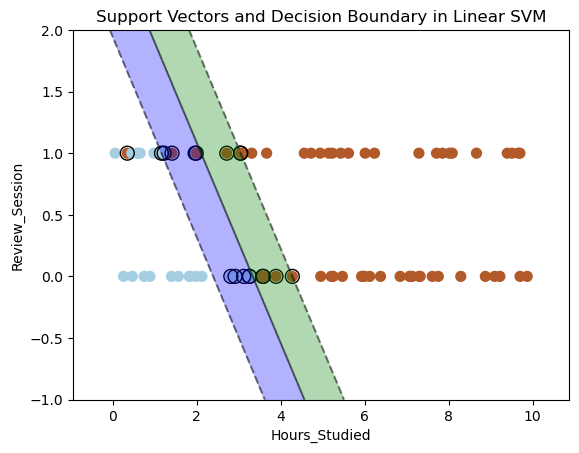

In [60]:
import matplotlib.pyplot as plt

# Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1, 100),
                     np.linspace(X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter plot of data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', s=50)

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot decision boundary lines with color
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'green', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Hours_Studied')
plt.ylabel('Review_Session')
plt.title('Support Vectors and Decision Boundary in Linear SVM')
plt.show()
